# Financial Data Analysis

### Downloaded the dataset from: [Kaggle](https://www.kaggle.com/datasets/samanfatima7/2020-2025-apple-stock-dataset)

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
df = pd.read_csv("./dataset/Apple Stock 2020-2025.csv")

In [54]:
df.head(20)

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
5,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600
6,2020-06-11,81.6294937133789,85.3136361549305,81.5274306203534,84.88835596262886,201662400
7,2020-06-12,82.33426666259766,84.52142258544907,81.22125057836313,83.77293248835645,200146000
8,2020-06-15,83.35250091552734,84.00621804239414,80.82268994587284,80.98551479918848,138808800
9,2020-06-16,85.56153106689453,85.83371668323046,83.7729272287711,85.41086152161019,165428800


In [55]:
df.tail()

,Date,Close,High,Low,Open,Volume
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900
1255,2025-06-02,201.6999969482422,202.1300048828125,200.1199951171875,200.27999877929688,35343100


In [56]:
df.drop(0, axis=0, inplace=True)
df

,Date,Close,High,Low,Open,Volume
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
5,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600
...,...,...,...,...,...,...
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900


## Calculating Weekly returns

In [57]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [58]:
df["Close"] = pd.to_numeric(df["Close"], errors="raise")

`.resample("W")` to group the daily data into weekly buckets

In [36]:
weekly_df = df["Close"].resample("W").last()
weekly_df

Date
2020-06-07     80.560219
2020-06-14     82.334267
2020-06-21     84.987999
2020-06-28     85.938202
2020-07-05     88.484993
                 ...    
2025-05-11    198.270004
2025-05-18    211.259995
2025-05-25    195.270004
2025-06-01    200.850006
2025-06-08    201.699997
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

__Used `".pct_change()"` to calculate fractional change between the current and a prior element.__

* Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.

In [42]:
weekly_returns = weekly_df.pct_change() * 100
weekly_returns

Date
2020-06-07         NaN
2020-06-14    2.202139
2020-06-21    3.223120
2020-06-28    1.118044
2020-07-05    2.963515
                ...   
2025-05-11   -3.321158
2025-05-18    6.551667
2025-05-25   -7.568868
2025-06-01    2.857583
2025-06-08    0.423197
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

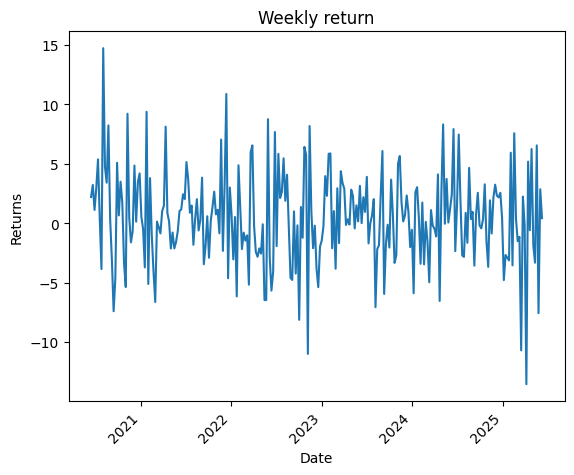

In [44]:
plt.plot(weekly_returns.index, weekly_returns)
plt.title('Weekly return')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45, ha="right")
plt.show()

## Trend Analysis

* 10 week moving average

__What is Moving Average (MA)__

* MAs are calculated to identify the trend directon of a stock or to or determine its support and resistance levels.

In [26]:
weekly_ma = weekly_df.rolling(10).mean()

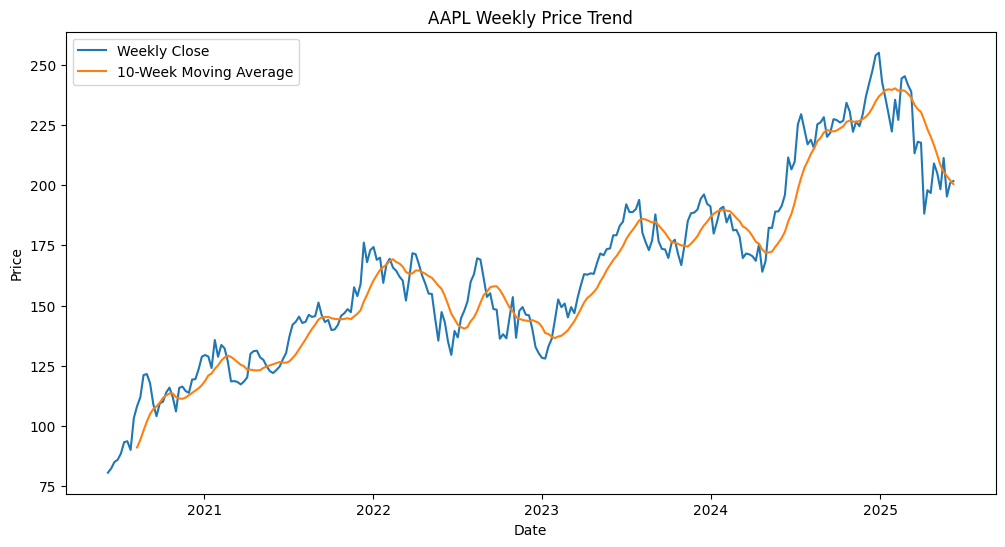

In [27]:
plt.figure(figsize=(12,6))
plt.plot(weekly_df.index, weekly_df, label="Weekly Close")
plt.plot(weekly_ma.index, weekly_ma, label="10-Week Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Weekly Price Trend")
plt.legend()
plt.show()

Over the observed period the weekly closing price of AAPL shows a clear upward trend. There are short term fluctuations. To smooth the weekly price noise a 10 week moving average is applied. Overall the graph shows a long-term upward trend.

## Cumulative Returns

__What is Cumulative return?__

* Cumulative return on an investment is the total return of an investment over the time we held it.


In [28]:
cumulative_returns = (1 + weekly_returns).cumprod()

___The following graph will illustrate "How much money you would make over the years if you have invested $1 2020"___

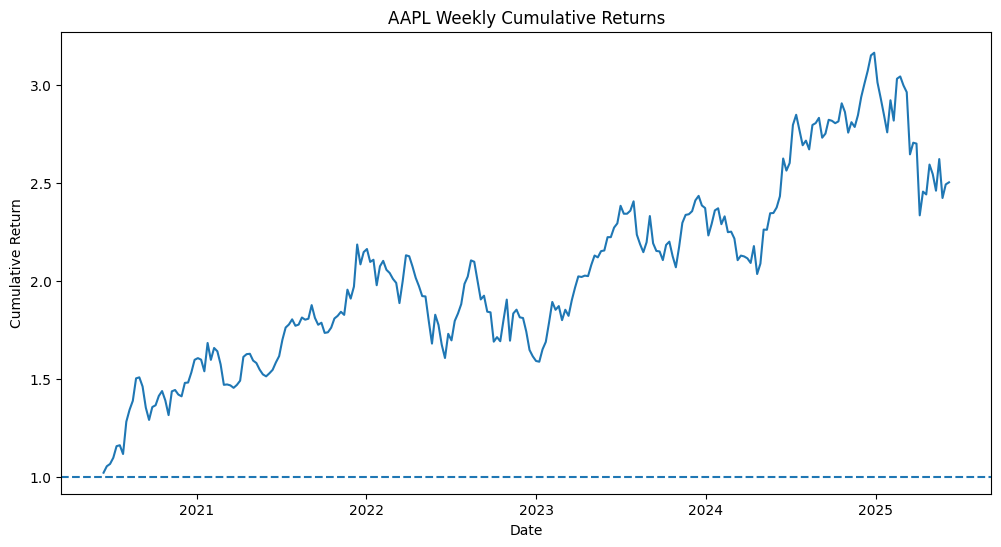

In [29]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns.index, cumulative_returns)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("AAPL Weekly Cumulative Returns")
plt.axhline(1, linestyle="--")  # starting value
plt.show()

## Closing Price trend

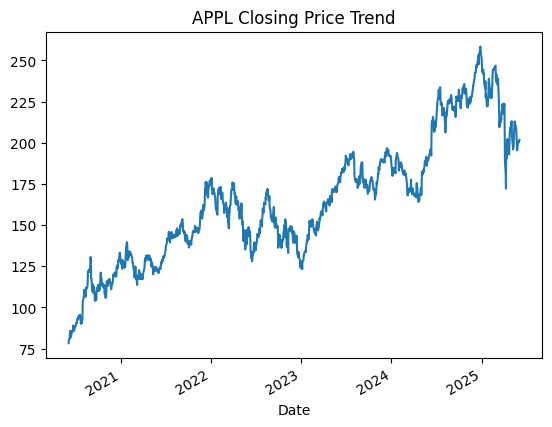

In [31]:
df["Close"].plot(title="APPL Closing Price Trend")
plt.show()

__Volatility Analysis__

___The higher the volatility, the riskier the security___

* **Daily Volatility**

In [61]:
df["daily_return"] = df["Close"].pct_change()

* **Annual Volatility**

In [63]:
daily_volatility = df["daily_return"].std()
daily_volatility * 100

np.float64(1.8946416897767036)

In [65]:
annualized_vol = daily_volatility * (252 ** 0.5)
annualized_vol * 100

np.float64(30.076504408346068)

* **5 Day rolling volatility**

In [66]:
df["rolling_vol_5d"] = df["daily_return"].rolling(window=5).std()

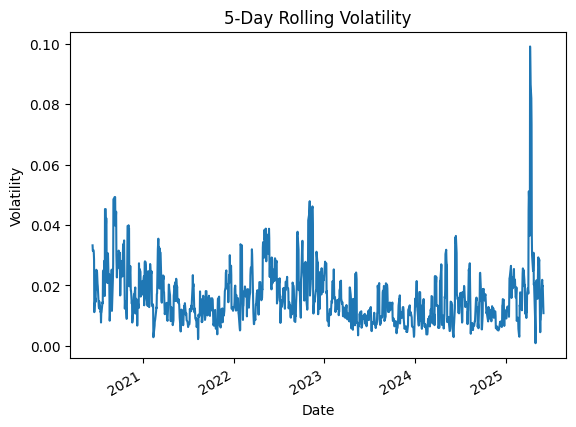

In [67]:

df["rolling_vol_5d"].plot(title="5-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()